In [2]:
import pickle
from scipy.cluster.vq import *
import glob

In [3]:
from PCV.clustering import hcluster
from PCV.tools import pca
from PCV.tools import imtools

In [4]:
# get list of images

imlist = glob.glob("image_sample_copy/animal_images/*.jpeg")
#imlist = imtools.get_imlist('data/image_sample/animal_images')

In [5]:
imlist

['image_sample_copy/animal_images/animal_3.jpeg',
 'image_sample_copy/animal_images/animal_2.jpeg',
 'image_sample_copy/animal_images/animal_9.jpeg',
 'image_sample_copy/animal_images/animal_10.jpeg',
 'image_sample_copy/animal_images/animal_5.jpeg',
 'image_sample_copy/animal_images/animal_4.jpeg',
 'image_sample_copy/animal_images/animal_8.jpeg',
 'image_sample_copy/animal_images/animal_7.jpeg',
 'image_sample_copy/animal_images/animal_6.jpeg',
 'image_sample_copy/animal_images/animal_1.jpeg']

In [6]:
from PIL import Image
from numpy import *
import numpy as np
from pylab import *

im = np.array(Image.open(imlist[0])) # open one image to get size
m,n = im.shape[0:2] # get the size of the images
imnbr = len(imlist) # get the number of images

In [7]:
arraylist = [array(Image.open(im)).astype(float) for im in imlist]

In [8]:
arraylist

[array([[[ 85., 135., 136.],
         [ 79., 129., 130.],
         [ 69., 120., 121.],
         ...,
         [156., 150., 152.],
         [148., 142., 144.],
         [148., 137., 141.]],
 
        [[ 65., 113., 113.],
         [ 68., 116., 116.],
         [ 71., 119., 119.],
         ...,
         [156., 150., 152.],
         [149., 143., 145.],
         [151., 140., 144.]],
 
        [[ 58., 100.,  99.],
         [ 53.,  95.,  93.],
         [ 54.,  94.,  93.],
         ...,
         [157., 151., 153.],
         [149., 143., 145.],
         [155., 144., 148.]],
 
        ...,
 
        [[206., 198., 196.],
         [206., 198., 196.],
         [207., 199., 197.],
         ...,
         [184., 170., 169.],
         [184., 170., 169.],
         [180., 170., 171.]],
 
        [[202., 194., 192.],
         [203., 195., 193.],
         [203., 195., 193.],
         ...,
         [184., 168., 168.],
         [183., 167., 167.],
         [179., 169., 170.]],
 
        [[201., 193., 191.],
 

In [9]:
shapelist = [array.data.shape for array in arraylist]

In [10]:
shapelist

[(224, 225, 3),
 (225, 225, 3),
 (218, 231, 3),
 (180, 279, 3),
 (168, 300, 3),
 (225, 225, 3),
 (201, 251, 3),
 (225, 225, 3),
 (183, 275, 3),
 (159, 318, 3)]

In [11]:
shapelistmean = (mean([shape[0] for shape in shapelist]),mean([shape[1] for shape in shapelist]))

In [12]:
shapelistmean

(200.8, 255.4)

In [13]:
import os
#size = 159, 225
size = 201, 225
for infile in imlist:
    file, ext = os.path.splitext(infile)
    im = Image.open(infile).resize(size)
    im.save(file + "_resized.jpg", "JPEG")

In [14]:
imlist_resized = glob.glob("image_sample_copy/animal_images/*.jpg")

In [15]:
imlist_resized

['image_sample_copy/animal_images/animal_7_resized.jpg',
 'image_sample_copy/animal_images/animal_2_resized.jpg',
 'image_sample_copy/animal_images/animal_1_resized.jpg',
 'image_sample_copy/animal_images/animal_8_resized.jpg',
 'image_sample_copy/animal_images/animal_4_resized.jpg',
 'image_sample_copy/animal_images/animal_3_resized.jpg',
 'image_sample_copy/animal_images/animal_10_resized.jpg',
 'image_sample_copy/animal_images/animal_6_resized.jpg',
 'image_sample_copy/animal_images/animal_5_resized.jpg',
 'image_sample_copy/animal_images/animal_9_resized.jpg']

In [17]:
# create matrix to store all flattened images
immatrix = np.array([np.array(Image.open(im)).flatten() for im in imlist_resized])

In [18]:
shapes = [im.data.shape for im in immatrix]

In [19]:
shapes

[(135675,),
 (135675,),
 (135675,),
 (135675,),
 (135675,),
 (135675,),
 (135675,),
 (135675,),
 (135675,),
 (135675,)]

In [20]:
# perform PCA
V,S,immean = pca.pca(immatrix)

/Users/jeffreysternberg/Documents/Image_Analysis_Project/PCV/PCV/tools/pca.py:24: RuntimeWarning: invalid value encountered in sqrt
  S = sqrt(e)[::-1] # reverse since eigenvalues are in increasing order


In [29]:
V

array([[-0.00230727, -0.00292029, -0.00338931, ..., -0.00183725,
        -0.00135564, -0.00221707],
       [ 0.00369335,  0.0026143 ,  0.00304423, ..., -0.0032714 ,
        -0.00378224, -0.00250616],
       [-0.00029455,  0.00087838,  0.00135333, ...,  0.00097209,
         0.00129199,  0.00122387],
       ...,
       [ 0.00191495,  0.00325677,  0.0027272 , ...,  0.00151268,
        -0.00040783,  0.00031953],
       [-0.0012742 , -0.00185558, -0.00177602, ..., -0.00044348,
        -0.00073597, -0.00079033],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan]])

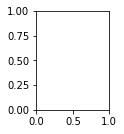

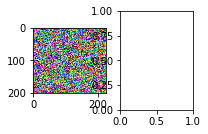

ValueError: Floating point image RGB values must be in the 0..1 range.

In [31]:
# show some images (mean and 7 first modes)
figure()
gray()
subplot(2,4,1)
imshow(immean.reshape(201,225,3))
for i in range(7):
    subplot(2,4,i+2)
    imshow(V[i].reshape(201,225,3))

show()

In [30]:
# save mean and principal components
f = open('sample_pca_modes.pkl', 'wb')
pickle.dump(immean,f)
pickle.dump(V,f)
f.close()